# Problem 1

Control volume (C.V.): Liquid volume of the bioreactor

Population species to track: Mass of FGF2 in the liquid solution

Dimensions for each mass balance term: Mass of FGF2 per time

{Accumulation w/in C.V.} = Change of mass of FGF2 in the liquid per unit time

{Mass In} = FGF2 fed into the bioreactor per unit time

{Mass Out} = 0

{Mass produced by reaction} = 0

{Mass consumed by reaction} = Proteolytic degradation of FGF2 or Removal of FGF2 by binding/internalization into stem cells

Change of mass of FGF2 in liquid per time= FGF2 feed rate − FGF2 proteolytic degradation rate − FGF2 cellular uptake

# Problem 2

Control volume (C.V.): Intracellular volume of a single cancer cell

Population species to track: Mass of anticancer drug inside the cell

Dimensions for each mass balance term: Mass of drug per time

{Accumulation w/in C.V.} = Change of mass of drug inside the cell per unit time

{Mass In} = Drug entering the cell by passive diffusion

{Mass Out} = Drug leaving the cell by passive diffusion and Drug leaving the cell via membrane transporter

{Mass produced by reaction} = 0

{Mass consumed by reaction} = Drug degraded by endogenous cellular enzymes

Change of intracellular drug mass per time = Passive diffusion into cell − Passive diffusion out of cell − Transporter-mediated efflux − Enzymatic degradation inside cell

# Problem 3a

(Eq 1.8) $0=v_{s,R} ​− k_{e,R}​[R]_{ss​}+k_r ​[C]_{ss​} − k_f ​[R]_{ss} ​[L]_0​$

(Eq 1.9) $0 = −k_{e,C} ​[C]_{ss} ​+ k_f ​[R]_{ss} ​[L]_0 ​− k_r ​[C]_{ss}$

$\implies k_f ​[R]_{ss} ​[L]_0 ​= (k_r​+k_{e,C}​)[C]_{ss}$

$\implies [C]_{ss} = \frac{k_f ​[R]_{ss} ​[L]_0}{k_r​+k_{e,C}​}$

$\implies 0=v_{s,R} ​− k_{e,R}​[R]_{ss​}+k_r \frac{k_f ​[R]_{ss} ​[L]_0}{k_r​+k_{e,C}​} − k_f ​[R]_{ss} ​[L]_0$

$\implies 0=v_{s,R} - [R]_{ss} ( k_{e,R} - \frac{ k_r k_f ​[L]_0}{k_r​+k_{e,C}​} + k_f ​[L]_0)$

$\implies [R]_{ss} = \frac{v_{s,R}}{( k_{e,R} - \frac{ k_r k_f ​[L]_0}{k_r​+k_{e,C}​} + k_f ​[L]_0)}$ 

$\implies [R]_{ss} = \frac{v_{s,R}(k_{e,C} + k_r)}{( k_{e,C}k_f [l_0] + k_{e,C}k_{e,R} + k_{e,R}k_r)}$ 

$\implies [R]_{ss} = \frac{\frac{V_{s,r}}{k_{e,R}}(k_{e,C} + k_r)}{k_{e,C} + k_r + \frac{k_{e,C}k_f[L]_0}{k_{e,R}}}$

$\implies [R]_{ss} = [R]_0\frac{(k_{e,C} + k_r)}{k_{e,C} + k_r + \frac{k_{e,C}k_f[L]_0}{k_{e,R}}}$

$ \implies [R]_{ss} = [R]_0 \frac{\frac{k_{e,c} + k_r}{k_f [L]_0}}{\frac{k_{e,c} + k_r}{k_f [L]_0} + \delta} = \frac{\kappa}{\kappa + \delta}$ 

$[C]_{ss} = \frac{k_f[R]_{ss}[L]_0}{k_r + k_{e,C}} = \frac{[R]_{ss}}{\kappa}$

$[R]_{ss}+[C]_{ss} = [R]_{ss} + \frac{[R]_{ss}}{\kappa} = [R]_{ss}(1+\frac{1}{\kappa}) = [R]_0(\frac{\kappa}{\kappa+\delta})(\frac{\kappa+1}{\kappa})$

$\therefore \frac{[R]_{ss}+[C]_{ss}}{[R]_0} = \frac{\kappa+1}{\kappa + \delta}$


# Problem 3b

Time to steady state ≈ 0.76 hours
Steady state total receptor ≈ 5.583e+01 nM


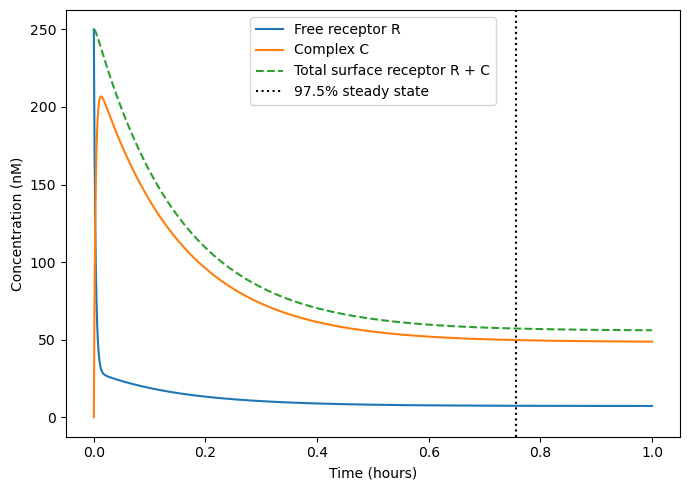

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

k_eC = 2e-3      # s^-1
k_eR = 4e-4      # s^-1
k_r  = 1e-2      # s^-1
k_f  = 8e5 * 1e-9      # nM^-1 s^-1
L0   = 1e-7 * 1e9      # nM
v_sR = 1e-10 * 1e9     # nM s^-1

def toy_model(t, y, params):
    R, C = y
    k_eC, k_eR, k_r, k_f, L0, v_sR = params
    
    dRdt = v_sR - k_eR*R + k_r*C - k_f*R*L0
    dCdt = -k_eC*C + k_f*R*L0 - k_r*C
    
    return [dRdt, dCdt]

R0 = v_sR / k_eR
C0 = 0.0
y0 = [R0, C0]

t_span = (0, (3600*1))  # seconds (~2 hours)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

params = (k_eC, k_eR, k_r, k_f, L0, v_sR)

sol = solve_ivp(
    toy_model,
    t_span,
    y0,
    args=(params,),
    t_eval=t_eval,
    method="LSODA",
)

t = sol.t
R = sol.y[0]
C = sol.y[1]
R_total = R + C

# Calculate steady state values analytically
# From part (a): (R_ss + C_ss)/R0 = (1+kappa)/(delta+kappa)
delta = k_eC / k_eR
kappa = (k_r + k_eC) / (k_f * L0)

R0_threashold = v_sR/k_eR
R_total_ss_analytical = R0_threashold * (1 + kappa) / (delta + kappa)
R_ss_analytical = R0_threashold * kappa / (delta + kappa)
C_ss_analytical = R0_threashold / (delta + kappa)


# Find time to reach 97.5% of steady state
# Define tolerance for “steady state”
tolerance = 0.025 * R_total_ss_analytical  # 2.5%

# Compute difference from steady state
diff = np.abs(R_total - R_total_ss_analytical)

# Find the **last point before steady state**: last index where diff > tolerance
indices_before_ss = np.where(diff > tolerance)[0]
t_ss_hours = t[indices_before_ss[-1]] / 3600  # convert to hours

print(f"Time to steady state ≈ {t_ss_hours:.2f} hours")
print(f"Steady state total receptor ≈ {R_total_ss_analytical:.3e} nM")

assert np.isclose(R[-1] + C[-1], R_total_ss_analytical, rtol=tolerance), "Numerical steady state check failed!, R + C = {:.3e}, expected {:.3e}".format(R[-1] + C[-1], R_total_ss_analytical)
assert np.isclose(R[-1], R_ss_analytical, rtol=0.025*R_ss_analytical), "Numerical steady state check failed!, R = {:.3e}, expected {:.3e}".format(R[-1], R_ss_analytical)
assert np.isclose(C[-1], C_ss_analytical, rtol=0.025*C_ss_analytical), "Numerical steady state check failed!, C = {:.3e}, expected {:.3e}".format(C[-1], C_ss_analytical)

plt.figure(figsize=(7,5))
plt.plot(t/3600, R, label="Free receptor R")
plt.plot(t/3600, C, label="Complex C")
plt.plot(t/3600, R_total, '--', label="Total surface receptor R + C")

plt.axvline(t_ss_hours, color='k', linestyle=':', label="97.5% steady state")

plt.xlabel("Time (hours)")
plt.ylabel("Concentration (nM)")
plt.legend()
plt.tight_layout()
plt.show()


# Problem 3c 

In [1]:
def J_func(k_eC, k_eR, k_r, k_f, L0):
    delta = k_eC / k_eR
    kappa = (k_r + k_eC) / (k_f * L0)
    return (1 + kappa) / (delta + kappa)

params = {
    'k_eC': 2e-3,
    'k_eR': 4e-4,
    'k_r': 0.01,
    'k_f': 8e5,
    'L0': 1e-7
}

delta_frac = 0.01  # 1% perturbation

S = {}

# Loop over parameters
for p in params:
    p0 = params[p]
    dp = delta_frac * p0
    params_perturbed = params.copy()
    params_perturbed[p] += dp
    J0 = J_func(**params)
    Jp = J_func(**params_perturbed)
    S[p] = (p0 / J0) * ((Jp - J0) / dp)

print(f"Baseline J0 = {J0:.4f}\n")
for p in S:
    print(f"S_{{{p}}} = {S[p]:+.4f}")



Baseline J0 = 0.2233

S_{k_eC} = -0.9448
S_{k_eR} = +0.9706
S_{k_r} = +0.0844
S_{k_f} = -0.1003
S_{L0} = -0.1003


# Problem 3d

Objective function is:
$ f = \frac{[R]_{ss} + [C]_{ss}}{[R]_0} = \frac{1+\kappa}{\delta + \kappa}$

where:
- $\delta = \frac{k_{e,C}}{k_{e,R}}$
- $ \kappa = \frac{k_r + k_{e,C}}{k_f[L]_0}$

Normalized local objective function:

$S_p = \frac{\partial f}{\partial p} \cdot \frac{p}{f}$

$\frac{\partial f}{\partial \kappa} = \frac{\delta - 1}{(\delta + \kappa)^2}$

$\frac{\partial f}{\partial \delta} = -\frac{1+\kappa}{(\delta + \kappa)^2}$

## Sensitivity to $k_{e,C}$

$\delta = \frac{k_{e,C}}{k_{e,R}} \implies \frac{\partial \delta}{\partial k_{e,C}} = \frac{1}{k_{e,R}}$

$\kappa = \frac{k_r + k_{e,C}}{k_f[L]_0} \implies \frac{\partial \kappa}{\partial k_{e,C}} = \frac{1}{k_f[L]_0}$

$ \implies \frac{\partial f}{\partial k_{e,C}} = \frac{\partial f}{\partial \delta} \cdot \frac{\partial \delta}{\partial k_{e,C}} + \frac{\partial f}{\partial \kappa} \cdot \frac{\partial \kappa}{\partial k_{e,C}} =  -\frac{1+\kappa}{(\delta + \kappa)^2} \cdot \frac{1}{k_{e,R}} + \frac{\delta - 1}{(\delta + \kappa)^2} \cdot \frac{1}{k_f[L]_0} = \frac{1}{(\delta + \kappa)^2}\left[\frac{-(1+\kappa)}{k_{e,R}} + \frac{\delta - 1}{k_f[L]_0} \right]$

## Normalize Sensitivity to $k_{e,C}$

$S_{k_{e,C}} = \frac{\partial f}{\partial k_{e,C}}\cdot \frac{k_{e,C}}{f} = k_{e,C} \cdot \frac{\delta + \kappa}{1+\kappa} \cdot \frac{1}{(\delta + \kappa)^2}\left[\frac{-(1+\kappa)}{k_{e,R}} + \frac{\delta - 1}{k_f[L]_0} \right] =\frac{k_{e,C}}{(1+\kappa)(\delta + \kappa)}\left[\frac{-(1+\kappa)}{k_{e,R}} + \frac{\delta - 1}{k_f[L]_0} \right]$

## Sensitivity to $k_{e,R}$

$\delta = \frac{k_{e,C}}{k_{e,R}} \implies \frac{\partial \delta}{\partial k_{e,R}} = \frac{-k_{e,C}}{k_{e,R}^2}$

$\frac{\partial f}{\partial k_{e,R}} = \frac{\partial f}{\partial \delta} \cdot \frac{\partial \delta}{\partial k_{e,R}} = -\frac{1+\kappa}{(\delta + \kappa)^2} \cdot \frac{-k_{e,C}}{k_{e,R}^2} = \frac{\delta(1+\kappa)}{k_{e,R}(\delta+\kappa)^2}$

## Normalize Sensitivity to $k_{e,R}$

$S_{k_{e,R}} = \frac{\partial f}{\partial k_{e,R}}\cdot \frac{k_{e,R}}{f} = \frac{\delta(1+\kappa)}{k_{e,R}(\delta+\kappa)^2} \cdot k_{e,R} \cdot \frac{\delta + \kappa}{1+\kappa} = \frac{\delta}{\delta +\kappa}$

## Sensitivity to $k_r$

$\kappa = \frac{k_r + k_{e,C}}{k_f[L]_0} \implies \frac{\partial \kappa}{\partial k_{r}} = \frac{1}{k_f[L]_0}$

$\implies \frac{\partial f}{\partial k_r} = \frac{\partial f}{\partial \kappa} \cdot \frac{\partial \kappa}{\partial k_r} = \frac{\delta - 1}{(\delta + \kappa)^2} \cdot \frac{1}{k_f[L]_0}$

## Normalized Sensitivity to $k_r$

$S_{k_r} = \frac{\partial f}{\partial k_r} \cdot \frac{k_r}{f} = \frac{\delta - 1}{(\delta + \kappa)^2} \cdot \frac{1}{k_f[L]_0} \cdot k_r \cdot \frac{\delta + \kappa}{1+\kappa} = \frac{(\delta - 1)\cdot k_r}{(\delta + \kappa) \cdot k_f \cdot [L]_0 \cdot (1+\kappa)}$

## Sensitivity to $k_f$ 

$\kappa = \frac{k_r + k_{e,C}}{k_f[L]_0} \implies \frac{\partial \kappa}{\partial k_{f}} = \frac{-(k_r + k_{e,C})}{k_f^2[L]_0} = -\kappa \cdot k_f^{-1}$

$ \frac{\partial f}{\partial k_f} = \frac{\partial f}{\partial \kappa}\cdot \frac{\partial \kappa}{\partial k_f} = \frac{\delta - 1}{(\delta + \kappa)^2} \cdot -\kappa \cdot k_f^{-1} $

## Normalize Sensitivity to $k_f$

$S_{k_f} = \frac{\partial f}{\partial k_f} \cdot \frac{k_f}{f} = \frac{\delta - 1}{(\delta + \kappa)^2} \cdot -\kappa \cdot k_f^{-1} \cdot k_f  \cdot \frac{\delta + \kappa}{1+\kappa} = \frac{-(\delta - 1)\kappa}{(\delta + \kappa)(1+\kappa)}$

## Sensitivity to $[L]_0$

$\kappa = \frac{k_r + k_{e,C}}{k_f[L]_0} \implies \frac{\partial \kappa}{\partial [L]_0} = \frac{-(k_r + k_{e,C})}{k_f[L]_0^2} = -\kappa \cdot [L]_0^{-1}$

$\frac{\partial f}{\partial [L]_0} = \frac{\partial f}{\partial \kappa} \cdot \frac{\partial \kappa}{\partial [L]_0} = \frac{\delta - 1}{(\delta + \kappa)^2} \cdot -\kappa \cdot [L]_0^{-1} $

## Normalize Sensitivity to $[L]_0$

$S_{[L]_0} = \frac{\partial f}{\partial [L]_0} \cdot \frac{[L]_0}{f} = \frac{\delta - 1}{(\delta + \kappa)^2} \cdot -\kappa \cdot [L]_0^{-1} \cdot [L]_0 \cdot \frac{\delta + \kappa}{1+\kappa} = \frac{-(\delta - 1)\kappa}{(\delta + \kappa)(1+\kappa)}$

---
| Parameter | Sensitivity Parameter Eq | Normalized Sensitivity Parameter Eq | 
|-----------|--------------------------|-------------------------------------|
| $k_{e,R}$ | $\frac{\partial f}{\partial k_{e,R}} = \frac{\delta(1+\kappa)}{k_{e,R}(\delta+\kappa)^2}$ | $S_{k_{e,R}} = \frac{\delta}{\delta+\kappa}$ |
| $k_{e,C}$ | $\frac{\partial f}{\partial k_{e,C}} = \frac{1}{(\delta+\kappa)^2} \left[ \frac{-(1+\kappa)}{k_{e,R}} + \frac{\delta - 1}{k_f [L]_0} \right]$ | $S_{k_{e,C}} = \frac{k_{e,C}}{(1+\kappa)(\delta + \kappa)}\left[\frac{-(1+\kappa)}{k_{e,R}} + \frac{\delta - 1}{k_f[L]_0} \right]$ |
| $k_r$ | $\frac{\partial f}{\partial k_r} = \frac{\delta - 1}{(\delta+\kappa)^2 k_f [L]_0}$ | $S_{k_r} = \frac{(\delta - 1) k_r}{(\delta + \kappa) k_f  [L]_0 (1+\kappa)}$ |
| $k_f$ | $\frac{\partial f}{\partial k_f} = \frac{-\kappa(\delta - 1)}{k_f(\delta+\kappa)^2}$ | $S_{k_f} = \frac{-\kappa(\delta - 1)}{(\delta+\kappa)(1+\kappa)}$ |
| $[L]_0$ | $\frac{\partial f}{\partial [L]_0} = \frac{-\kappa(\delta - 1)}{[L]_0(\delta+\kappa)^2}$ | $S_{[L]_0} = \frac{-\kappa(\delta - 1)}{(\delta+\kappa)(1+\kappa)}$ |

---

| Symbol | Value |
|--------|-----------------|
| $k_{e,C}$ | $2 \times 10^{-3}$ |
| $k_{e,R}$ | $4 \times 10^{-4}$ |
| $k_r$ | $0.01$ |
| $k_f$ | $8 \times 10^5$ |
| $[L]_0$ | $1 \times 10^{-7}$ |
| $s_R$ | $1 \times 10^{-10}$ |
| $\delta$ | $\delta = \frac{k_{e,C}}{k_{e,R}} = \frac{2 \times 10^{-3}}{4 \times 10^{-4}} = 5$ |
| $\kappa$ | $\kappa = \frac{k_r + k_{e,C}}{k_f [L]_0} = \frac{ 0.01 + 2 \times 10^{-3}}{8 \times 10^5 \cdot 1 \times 10^{-7} }= 0.15$ |

---

| Parameter | Normalized Sensitivity Equation | Numerical Substitution |
|-----------|--------------------------------|-------------------------|
| $k_{e,R}$ | $S_{k_{e,R}} = \frac{\delta}{\delta+\kappa}$ | $S_{k_{e,R}} = \frac{5}{5+0.15}$ |
| $k_{e,C}$ | $S_{k_{e,C}} = \frac{k_{e,C}}{(1+\kappa)(\delta + \kappa)}\left[\frac{-(1+\kappa)}{k_{e,R}} + \frac{\delta - 1}{k_f[L]_0} \right]$ | $S_{k_{e,C}} = \frac{2 \times 10^{-3}}{(1.15)(5.15)}\left[\frac{-1.15}{4 \times 10^{-4}} + \frac{4}{8 \times 10^5 \times 10^{-7}} \right]$ |
| $k_r$ | $S_{k_r} = \frac{(\delta - 1) k_r}{(\delta + \kappa) k_f  [L]_0 (1+\kappa)}$ | $S_{k_r} = \frac{(5-1)(0.01)}{(5.15)(8 \times 10^5)(10^{-7})(1.15)}$ |
| $k_f$ | $S_{k_f} = \frac{-\kappa(\delta - 1)}{(\delta+\kappa)(1+\kappa)}$ | $S_{k_f} = \frac{-(0.15)(5-1)}{(5.15)(1.15)}$ |
| $[L]_0$ | $S_{[L]_0} = \frac{-\kappa(\delta - 1)}{(\delta+\kappa)(1+\kappa)}$ | $S_{[L]_0} = \frac{-(0.15)(5-1)}{(5.15)(1.15)}$ |

---

|  Analytical Value | Computational Value |
| ------------------|---------------------|
| $S_{k_{e,R}} = 0.971$ | $S_{k_{e,R}} = 0.9706$ |
| $S_{k_{e,C}} = -0.945$ | $S_{k_eC} = -0.9448$ |
| $S_{k_r} = 0.084$ | $S_{k_r} = 0.0844$ |
| $S_{k_f} = -0.101$ | $S_{k_f} = -0.1003$ |
| $S_{[L]_0} = -0.101$ | $S_{L0} = -0.1003$ |
---